In [1]:
# Tutorial:  https://www.datacamp.com/tutorial/convolutional-neural-networks-python 

In [2]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Przygotowanie danych

Zaczynam od podziału  na zbiór treningowy i testowy. Potrzebuję zdjęć i etykiet oznaczających emocje.
W przypadku tego zbioru danych nazwy podfolderów to nazwy etykiet. 
Wymagane jest wykonanie odpowiednich przekształceń, aby zarówno zdjęcia, jak i etykiety przekształcić do list.

In [3]:
dataset_dir = 'ck_dataset'

images = []
labels = []

In [4]:
for label in os.listdir(dataset_dir):
    print(label)

anger
contempt
disgust
fear
happy
sadness
surprise


In [5]:
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(label_dir):

        # przechodzę przez każdy obraz w podfolderze
        for filename in os.listdir(label_dir):

            # zapisuję ścieżkę do obrazu
            img_path = os.path.join(label_dir, filename)

            # wczytuję obraz
            # ważne: jeśli nie wczytam tutaj w skali szarości, to wczytują się 3 kanały koloru (RGB)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # jeśli obraz został odpowiednio wczytany
            if img is not None:

                # dodaję obraz oraz odpowiadającą mu etykietę do list
                images.append(img)
                labels.append(label)

In [6]:
print(len(images))
print(len(labels))

981
981


In [7]:
# Zamieniam listy na numpy arrays
X = np.array(images)
y = np.array(labels)

In [8]:
# podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Sprawdzenie kształtu danych 
print("Kształt X_train:", X_train.shape)
print("Kształt y_train:", y_train.shape)
print("Kształt X_test:", X_test.shape)
print("Kształt y_test:", y_test.shape)

Kształt X_train: (784, 48, 48)
Kształt y_train: (784,)
Kształt X_test: (197, 48, 48)
Kształt y_test: (197,)


**Komentarz**

- Zdjęcia są rozmiaru 48x48 pikseli
- W zbiorze treningowym jest 784 zdjęć, a w testowym 197 zdjęć

In [10]:
# klasy są zapisane jako string. Trzeba to zmienić na inną formę akceptowalną przez model
y_test

array(['surprise', 'happy', 'contempt', 'happy', 'anger', 'surprise',
       'surprise', 'happy', 'surprise', 'disgust', 'fear', 'anger',
       'happy', 'happy', 'surprise', 'surprise', 'anger', 'happy',
       'happy', 'surprise', 'surprise', 'sadness', 'happy', 'sadness',
       'surprise', 'fear', 'surprise', 'disgust', 'disgust', 'surprise',
       'anger', 'anger', 'surprise', 'sadness', 'disgust', 'sadness',
       'anger', 'disgust', 'surprise', 'sadness', 'surprise', 'surprise',
       'happy', 'disgust', 'anger', 'happy', 'surprise', 'disgust',
       'surprise', 'disgust', 'disgust', 'happy', 'anger', 'surprise',
       'disgust', 'disgust', 'surprise', 'anger', 'surprise', 'contempt',
       'anger', 'disgust', 'surprise', 'fear', 'disgust', 'sadness',
       'surprise', 'anger', 'happy', 'disgust', 'sadness', 'disgust',
       'sadness', 'happy', 'contempt', 'anger', 'surprise', 'contempt',
       'happy', 'disgust', 'happy', 'disgust', 'happy', 'surprise',
       'surpris

Etykiety są w formie tekstu. Aby można je było przekazać do modelu sieci neuronowej trzeba je przekształcić na formę numeryczną.
Zastosuję kodowanie "one-hot encoding". 
Klasy (emocje) będą reprezentowane przez wektory binarne o długości liczby klas, z jedynką na pozycji odpowiadającej etykiecie klasy, a resztą zer.

Czyli:

- anger -> [1, 0, 0, 0, 0, 0, 0]
- contempt -> [0, 1, 0, 0, 0, 0, 0]
- disgust -> [0, 0, 1, 0, 0, 0, 0]
- fear -> [0, 0, 0, 1, 0, 0, 0]
- happy -> [0, 0, 0, 0, 1, 0, 0]
- sadness -> [0, 0, 0, 0, 0, 1, 0]
- surprise -> [0, 0, 0, 0, 0, 0, 1]

In [11]:
# najpierw przekształcenie z tekstu na liczby
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

In [12]:
# przekształcenie "one-hot" na wektory binarne
Y_train = to_categorical(y_train_encoded, 7)
Y_test = to_categorical(y_test_encoded, 7)

In [13]:
print(f"y_test_encoded:\n{y_test_encoded}")
print(f"Y_test:\n{Y_test}")

y_test_encoded:
[6 4 1 4 0 6 6 4 6 2 3 0 4 4 6 6 0 4 4 6 6 5 4 5 6 3 6 2 2 6 0 0 6 5 2 5 0
 2 6 5 6 6 4 2 0 4 6 2 6 2 2 4 0 6 2 2 6 0 6 1 0 2 6 3 2 5 6 0 4 2 5 2 5 4
 1 0 6 1 4 2 4 2 4 6 6 4 5 6 2 0 2 4 2 2 4 4 2 2 6 4 3 5 5 5 6 6 6 6 0 4 6
 2 0 2 0 0 2 4 3 2 4 4 4 5 2 2 6 4 5 2 4 6 3 2 0 4 3 3 2 4 1 2 4 2 5 0 4 4
 2 2 3 4 6 3 6 6 1 1 4 2 4 6 3 4 6 2 4 3 4 0 0 5 2 6 6 1 4 3 0 1 2 3 2 5 6
 6 5 6 2 0 5 3 4 2 6 4 4]
Y_test:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Text(0.5, 1.0, 'Emotion : surprise')

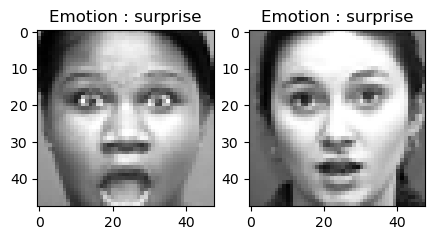

In [14]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Emotion : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Emotion : {}".format(y_train[0]))

## Data Preprocessing

Te kroki tak jak w tutorialu

In [15]:
# zmiana wymiarów
X_train = X_train.reshape(-1, 48,48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)
X_train.shape, X_test.shape

((784, 48, 48, 1), (197, 48, 48, 1))

In [16]:
# zmiana typu oraz normalizacja
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [17]:
# wydzielenie dodatkowo podzbioru walidacyjnego do oceny jakości sieci po każdej epoce
X_train, X_valid, train_label, valid_label = train_test_split(X_train, Y_train, test_size=0.2, random_state=13)


In [18]:
X_train.shape, X_valid.shape, train_label.shape, valid_label.shape

((627, 48, 48, 1), (157, 48, 48, 1), (627, 7), (157, 7))

## Budowanie sieci

Zgodnie z tutorialem: 

You'll use three convolutional layers:

- The first layer will have 32-3 x 3 filters,
- The second layer will have 64-3 x 3 filters and
- The third layer will have 128-3 x 3 filters.

In addition, there are three max-pooling layers each of size 2 x 2.

In [19]:
# biblioteki niezbędne do zbudowania modelu
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [20]:
# batch_size oznacza wielkość batcha danych pobieranych za każdym razem
# w jednej epoce przetwarzany jest cały zbiór treningowy, gdzie za każdym razem brany jest pod uwagę batch
# kolejne batche są przetwarzane, aż w końcu cały zbiór jest przetworzony
batch_size = 64

# 20 epok uczenia
epochs = 20

# u nas jest 7 klas emocji
num_classes = 7

In [21]:
# będziemy budować model warstwa po warstwie (sklejanie warstw)
# uwaga: używamy funkcji Conv2D() ponieważ pracujemy na obrazach

emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(48, 48, 1), padding='same'))
emotion_model.add(LeakyReLU(alpha=0.1))
emotion_model.add(MaxPooling2D((2, 2), padding='same'))

emotion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
emotion_model.add(LeakyReLU(alpha=0.1))
emotion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

emotion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
emotion_model.add(LeakyReLU(alpha=0.1))
emotion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

emotion_model.add(Flatten())

emotion_model.add(Dense(128, activation='linear'))
emotion_model.add(LeakyReLU(alpha=0.1))

emotion_model.add(Dense(num_classes, activation='softmax'))

In [22]:
# kompilacja modelu
# categorical_crossentropy jest używana do klasyfikacji wieloklasowej
emotion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [23]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [24]:
# Trenowanie modelu
# obiekt emotion_train będzie przechowywał historię trenowania modelu
emotion_train = emotion_model.fit(
    X_train, 
    train_label, 
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_valid, valid_label))

Epoch 1/20
10/10 [==============================] - 2s 117ms/step - loss: 1.8574 - accuracy: 0.2663 - val_loss: 1.8583 - val_accuracy: 0.2102
Epoch 2/20
10/10 [==============================] - 1s 83ms/step - loss: 1.7709 - accuracy: 0.2727 - val_loss: 1.7747 - val_accuracy: 0.2102
Epoch 3/20
10/10 [==============================] - 1s 75ms/step - loss: 1.5680 - accuracy: 0.4370 - val_loss: 1.4270 - val_accuracy: 0.5732
Epoch 4/20
10/10 [==============================] - 1s 73ms/step - loss: 1.0644 - accuracy: 0.6667 - val_loss: 1.1411 - val_accuracy: 0.5924
Epoch 5/20
10/10 [==============================] - 1s 78ms/step - loss: 0.8093 - accuracy: 0.7081 - val_loss: 0.7631 - val_accuracy: 0.7707
Epoch 6/20
10/10 [==============================] - 1s 75ms/step - loss: 0.6124 - accuracy: 0.7959 - val_loss: 0.6776 - val_accuracy: 0.7643
Epoch 7/20
10/10 [==============================] - 1s 77ms/step - loss: 0.4105 - accuracy: 0.8772 - val_loss: 0.5005 - val_accuracy: 0.8471
Epoch 8/20
1

**Komentarz:**

- Udało się osiągnąć wartość metryki accuracy ponad 98% dla zbioru treningowego, oraz ponad 93% dla zbioru walidacyjnego (na samym początku trenowania te wartości wynosiły odpowiednio 26% i 21%)
- wartość funkcji straty spadła dla zbioru treningowego z 1.8 do 0.06, a dla zbioru walidacyjnego z 1.8 do 0.16

In [25]:
# pomocnicza funkcja do wizualizacji historii trenowania dla zbioru treningowego i walidacyjnego

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

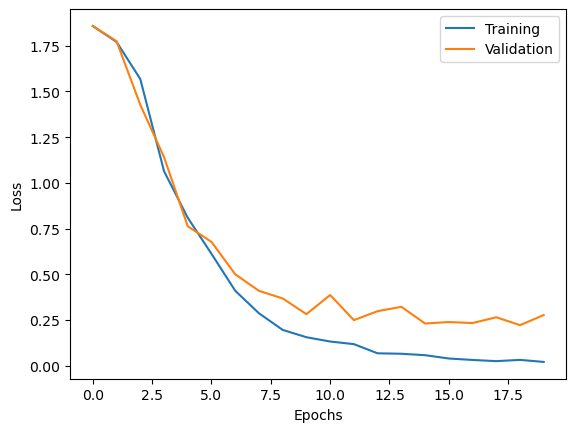

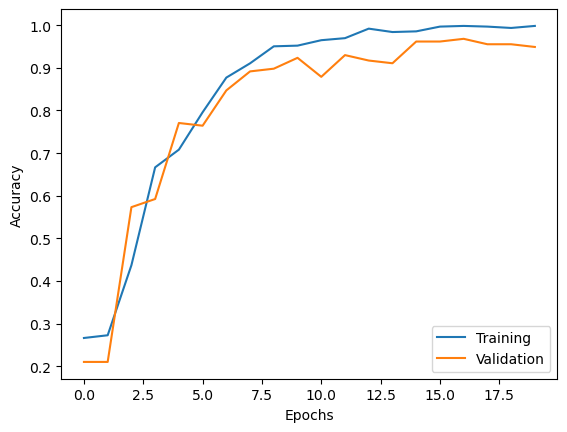

In [26]:
plot_history(emotion_train)

**Komentarz:**

- Dla zbioru walidacyjnego, accuracy oraz wartość funkcji straty są mniej więcej stałe po 10 epokach uczenia sieci
- W 17 epoce uczenia dzieje się coś dziwnego i funkcja straty gwałtownie rośnie, a accuracy gwałtownie maleje. Potem jednak obie wracają do poprzedniego stanu

## Ewaluacja modelu na zbiorze testowym

In [27]:
test_eval = emotion_model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.19104839861392975
Test accuracy: 0.9593908786773682


**Komentarz:**

Acucuracy dla zbioru testowego to az 95% bez żadnego większego preprocessingu!

In [29]:
# W tym miejscu można w kolejnym kroku dodac też do modelu specjalną warstę Dropout, która potencjalnie pomoże przy overfittingu
# to może być zadanie na kolejny tydzień

In [30]:
# # tą linią można zapisać wyuczony model, a później bezpośrednio go załadować
# emotion_mnodel.save("simple_emotion_model.h5py")

## Przewidywanie klas

In [31]:
predicted_classes = emotion_model.predict(X_test)

7/7 [==============================] - 1s 17ms/step


In [32]:
predicted_classes

array([[4.82320449e-14, 3.21531588e-05, 1.21975083e-10, ...,
        8.25423827e-11, 4.11378533e-05, 9.99688566e-01],
       [1.55617926e-07, 6.98768417e-06, 2.89598037e-03, ...,
        9.97096777e-01, 7.70966513e-10, 1.33172759e-12],
       [6.49559695e-07, 9.99894083e-01, 1.44825754e-06, ...,
        6.77067828e-06, 2.88791216e-05, 1.50024152e-06],
       ...,
       [1.41442128e-17, 1.00103736e-09, 1.04381014e-14, ...,
        9.07364920e-17, 1.19900491e-07, 9.99999881e-01],
       [1.04708085e-13, 2.33439674e-11, 8.05130469e-08, ...,
        9.99999881e-01, 5.86029401e-15, 1.09778435e-19],
       [5.99955978e-16, 5.21974020e-09, 5.31266897e-09, ...,
        9.99999642e-01, 1.39783400e-12, 5.29296023e-15]], dtype=float32)

In [33]:
# przekształcenie wartości predicted_classes, które są liczbami zmiennoprzecinkowymi na integery
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [34]:
predicted_classes

array([6, 4, 1, 4, 0, 6, 6, 4, 6, 1, 3, 0, 4, 4, 1, 6, 0, 4, 4, 6, 6, 5,
       4, 5, 6, 3, 6, 2, 2, 6, 0, 1, 6, 5, 2, 5, 0, 2, 6, 5, 6, 6, 4, 2,
       0, 4, 6, 2, 6, 2, 2, 4, 0, 6, 2, 2, 6, 0, 6, 1, 0, 2, 6, 3, 2, 5,
       6, 0, 4, 0, 5, 2, 5, 4, 1, 0, 6, 1, 4, 2, 4, 2, 4, 6, 1, 4, 5, 6,
       2, 0, 2, 4, 2, 2, 4, 4, 2, 2, 6, 4, 1, 5, 5, 5, 6, 6, 6, 6, 0, 4,
       6, 2, 0, 2, 0, 0, 2, 4, 3, 2, 4, 4, 4, 5, 2, 2, 6, 4, 5, 2, 4, 6,
       3, 2, 2, 4, 1, 3, 2, 4, 1, 2, 4, 2, 5, 0, 4, 4, 2, 2, 3, 4, 6, 3,
       6, 6, 1, 1, 4, 2, 4, 6, 3, 4, 6, 2, 4, 3, 4, 0, 0, 5, 2, 6, 6, 1,
       4, 3, 0, 1, 2, 3, 2, 5, 6, 6, 5, 6, 2, 0, 5, 3, 4, 2, 6, 4, 4],
      dtype=int64)

In [35]:
predicted_classes.shape, Y_test.shape

((197,), (197, 7))

Found 189 correct labels


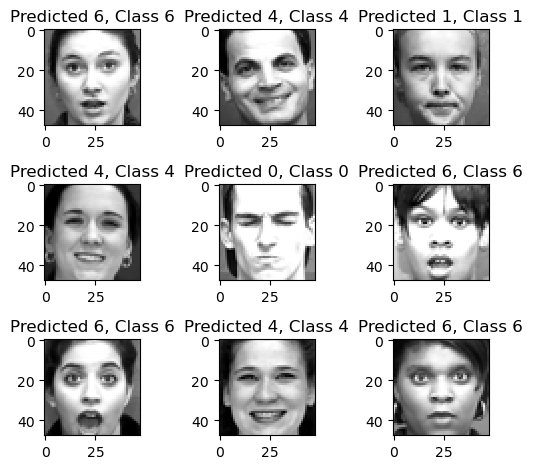

In [36]:
correct = np.where(predicted_classes==y_test_encoded)[0]
print(f"Found {len(correct)} correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(48,48), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_encoded[correct]))
    plt.tight_layout()

Found 8 correct labels


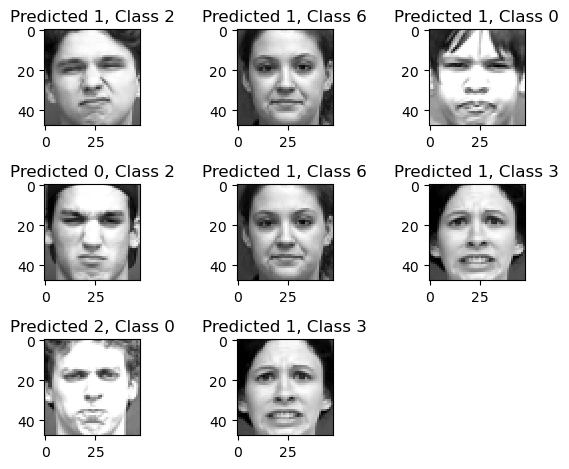

In [37]:
incorrect = np.where(predicted_classes!=y_test_encoded)[0]
print(f"Found {len(incorrect)} correct labels")
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(48,48), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test_encoded[incorrect]))
    plt.tight_layout()

In [38]:
# Mapowanie emocji na inty:

label_encoder = LabelEncoder()
label_encoder.fit(y_test)

for word, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{word}: {encoded_label}")

anger: 0
contempt: 1
disgust: 2
fear: 3
happy: 4
sadness: 5
surprise: 6
